In [172]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import seaborn as sns
import datetime as dt


In [173]:
df = pd.read_csv("https://raw.githubusercontent.com/byoung6/covid/lings_branch/clean_selected_covid_data2.csv")
df.head(5)

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations
0,2021-11-15,Argentina,South America,1298.571,565.0,12.389,15.286,356203.0,60.26,1.96,0.187,27479827.0,892457.0,1297018.0
1,2021-11-20,Argentina,South America,1364.429,572.0,12.542,20.857,440583.0,62.23,2.77,0.122,28379784.0,1263315.0,214081.0
2,2021-11-21,Argentina,South America,1372.286,561.0,12.301,20.714,425164.0,62.36,2.84,0.103,28439413.0,1294189.0,114402.0
3,2021-11-22,Argentina,South America,1261.429,566.0,12.411,18.857,258749.0,62.50,2.91,0.108,28505739.0,1327224.0,132111.0
4,2021-11-23,Argentina,South America,1264.571,570.0,12.498,17.286,255271.0,62.81,3.11,0.110,28645100.0,1420213.0,300974.0


# Cleaning Data

In [174]:
# looking at info on our selected columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5539 non-null   object 
 1   location                                    5539 non-null   object 
 2   continent                                   5539 non-null   object 
 3   new_cases_smoothed                          5539 non-null   float64
 4   icu_patients                                5539 non-null   float64
 5   icu_patients_per_million                    5539 non-null   float64
 6   new_deaths_smoothed                         5539 non-null   float64
 7   new_vaccinations_smoothed                   5539 non-null   float64
 8   people_fully_vaccinated_per_hundred         5539 non-null   float64
 9   total_boosters_per_hundred                  5539 non-null   float64
 10  new_people_v

In [175]:
# checking for nulls
df.isnull().sum()

date                                          0
location                                      0
continent                                     0
new_cases_smoothed                            0
icu_patients                                  0
icu_patients_per_million                      0
new_deaths_smoothed                           0
new_vaccinations_smoothed                     0
people_fully_vaccinated_per_hundred           0
total_boosters_per_hundred                    0
new_people_vaccinated_smoothed_per_hundred    0
people_fully_vaccinated                       0
total_boosters                                0
new_vaccinations                              0
dtype: int64

In [176]:
# dropping nulls
clean_selection = df.dropna()

In [177]:
# double checking there are no nulls after drop
clean_selection.isnull().sum()

date                                          0
location                                      0
continent                                     0
new_cases_smoothed                            0
icu_patients                                  0
icu_patients_per_million                      0
new_deaths_smoothed                           0
new_vaccinations_smoothed                     0
people_fully_vaccinated_per_hundred           0
total_boosters_per_hundred                    0
new_people_vaccinated_smoothed_per_hundred    0
people_fully_vaccinated                       0
total_boosters                                0
new_vaccinations                              0
dtype: int64

In [178]:
#  1. Get the total vaccination rate for north america
usa_vaccination = df.groupby('location')
usa_vaccination

In [179]:
for location, location_df in usa_vaccination:
    print(location)
    print(location_df)

Argentina
          date   location      continent  new_cases_smoothed  icu_patients  \
0   2021-11-15  Argentina  South America            1298.571         565.0   
1   2021-11-20  Argentina  South America            1364.429         572.0   
2   2021-11-21  Argentina  South America            1372.286         561.0   
3   2021-11-22  Argentina  South America            1261.429         566.0   
4   2021-11-23  Argentina  South America            1264.571         570.0   
..         ...        ...            ...                 ...           ...   
62  2022-02-17  Argentina  South America           14203.000        1789.0   
63  2022-02-18  Argentina  South America           14043.857        1645.0   
64  2022-02-19  Argentina  South America           13541.714        1625.0   
65  2022-02-22  Argentina  South America           12778.571        1474.0   
66  2022-02-23  Argentina  South America           12140.000        1452.0   

    icu_patients_per_million  new_deaths_smoothed  ne

In [180]:
usa_vaccination.get_group('United States')

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations
5342,2021-08-13,United States,North America,128519.857,20076.0,60.304,654.429,714641.0,51.94,0.00,0.140,172448325.0,13708.0,946795.0
5343,2021-08-14,United States,North America,129633.714,20401.0,61.280,655.857,724200.0,52.01,0.01,0.139,172689810.0,49662.0,624091.0
5344,2021-08-15,United States,North America,131253.000,21077.0,63.310,665.429,731162.0,52.06,0.02,0.138,172850612.0,82479.0,398560.0
5345,2021-08-16,United States,North America,136733.571,21673.0,65.101,742.429,743652.0,52.17,0.05,0.136,173203214.0,161912.0,868638.0
5346,2021-08-17,United States,North America,141249.714,22303.0,66.993,765.714,761348.0,52.28,0.08,0.134,173565158.0,260778.0,921824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,2022-02-21,United States,North America,87729.143,10458.0,31.413,1892.714,333675.0,64.59,28.16,0.026,214451304.0,93500011.0,297125.0
5535,2022-02-22,United States,North America,84220.571,10182.0,30.584,1821.000,324436.0,64.62,28.20,0.025,214538081.0,93639190.0,312998.0
5536,2022-02-23,United States,North America,79870.857,9627.0,28.917,1782.714,311987.0,64.64,28.24,0.024,214618039.0,93773340.0,296732.0
5537,2022-02-24,United States,North America,74750.286,9410.0,28.265,1742.000,294823.0,64.66,28.28,0.023,214685560.0,93893552.0,259048.0


In [181]:
location_df.head(10)

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations
5342,2021-08-13,United States,North America,128519.857,20076.0,60.304,654.429,714641.0,51.94,0.00,0.140,172448325.0,13708.0,946795.0
5343,2021-08-14,United States,North America,129633.714,20401.0,61.280,655.857,724200.0,52.01,0.01,0.139,172689810.0,49662.0,624091.0
5344,2021-08-15,United States,North America,131253.000,21077.0,63.310,665.429,731162.0,52.06,0.02,0.138,172850612.0,82479.0,398560.0
5345,2021-08-16,United States,North America,136733.571,21673.0,65.101,742.429,743652.0,52.17,0.05,0.136,173203214.0,161912.0,868638.0
5346,2021-08-17,United States,North America,141249.714,22303.0,66.993,765.714,761348.0,52.28,0.08,0.134,173565158.0,260778.0,921824.0
5347,2021-08-18,United States,North America,143192.143,22700.0,68.186,822.286,787492.0,52.39,0.11,0.134,173942086.0,376273.0,950877.0
5348,2021-08-19,United States,North America,144538.571,23034.0,69.189,932.143,807692.0,52.51,0.15,0.132,174321427.0,489508.0,943057.0
5349,2021-08-20,United States,North America,146546.714,23399.0,70.285,992.714,830297.0,52.65,0.18,0.130,174797463.0,610280.0,1105031.0
5350,2021-08-21,United States,North America,148581.429,23653.0,71.048,1034.143,836045.0,52.74,0.20,0.129,175093189.0,671403.0,664326.0
5351,2021-08-22,United States,North America,148026.000,24082.0,72.337,1033.429,834585.0,52.79,0.21,0.127,175271426.0,702797.0,388341.0


# Linear Regression Model

(197,)


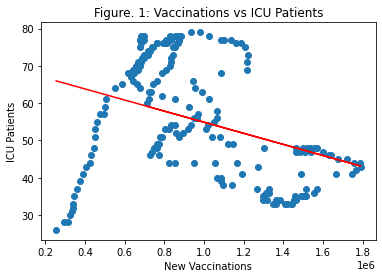

In [205]:
X = location_df.new_vaccinations_smoothed.values.reshape(-1, 1)
y = location_df.icu_patients_per_million
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.xlabel('New Vaccinations')
plt.ylabel('ICU Patients')
plt.title('Figure. 1: Vaccinations vs ICU Patients')
plt.plot(X, y_pred, color='red')
plt.show()

In [207]:
y[:10]

5342    60
5343    61
5344    63
5345    65
5346    66
5347    68
5348    69
5349    70
5350    71
5351    72
Name: icu_patients_per_million, dtype: int32

In [208]:
y_pred[:10]

array([59.12261486, 58.98039101, 58.87680669, 58.69097387, 58.42768343,
       58.03869918, 57.7381529 , 57.40182376, 57.31630198, 57.33802463])

(197,)


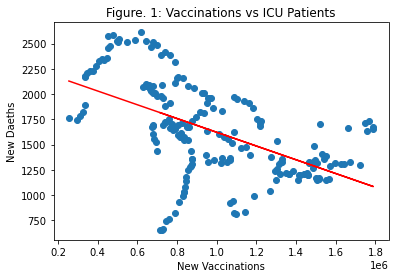

In [183]:
X = location_df.new_vaccinations_smoothed.values.reshape(-1, 1)
y = location_df.new_deaths_smoothed
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.xlabel('New Vaccinations')
plt.ylabel('New Daeths')
plt.title('Figure. 1: Vaccinations vs ICU Patients')
plt.plot(X, y_pred, color='red')
plt.show()

# Coorelation Tested

In [184]:
location_df.corr()

,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations
new_cases_smoothed,1.000000,0.573478,0.573476,0.379019,-0.083762,0.467709,0.564573,-0.145607,0.467646,0.564572,-0.103095
icu_patients,0.573478,1.000000,1.000000,0.277879,-0.352798,-0.316436,-0.168693,0.065984,-0.316495,-0.168685,-0.268998
icu_patients_per_million,0.573476,1.000000,1.000000,0.277878,-0.352797,-0.316439,-0.168695,0.065985,-0.316497,-0.168687,-0.268997
new_deaths_smoothed,0.379019,0.277879,0.277878,1.000000,-0.549042,0.479600,0.436737,-0.739123,0.479609,0.436730,-0.425272
new_vaccinations_smoothed,-0.083762,-0.352798,-0.352797,-0.549042,1.000000,0.034805,-0.033687,0.658536,0.034820,-0.033706,0.697989
people_fully_vaccinated_per_hundred,0.467709,-0.316436,-0.316439,0.479600,0.034805,1.000000,0.958171,-0.528109,1.000000,0.958159,-0.019784
total_boosters_per_hundred,0.564573,-0.168693,-0.168695,0.436737,-0.033687,0.958171,1.000000,-0.447257,0.958170,1.000000,-0.078955
new_people_vaccinated_smoothed_per_hundred,-0.145607,0.065984,0.065985,-0.739123,0.658536,-0.528109,-0.447257,1.000000,-0.528127,-0.447253,0.455193
people_fully_vaccinated,0.467646,-0.316495,-0.316497,0.479609,0.034820,1.000000,0.958170,-0.528127,1.000000,0.958158,-0.019802
total_boosters,0.564572,-0.168685,-0.168687,0.436730,-0.033706,0.958159,1.000000,-0.447253,0.958158,1.000000,-0.078951


<AxesSubplot:>

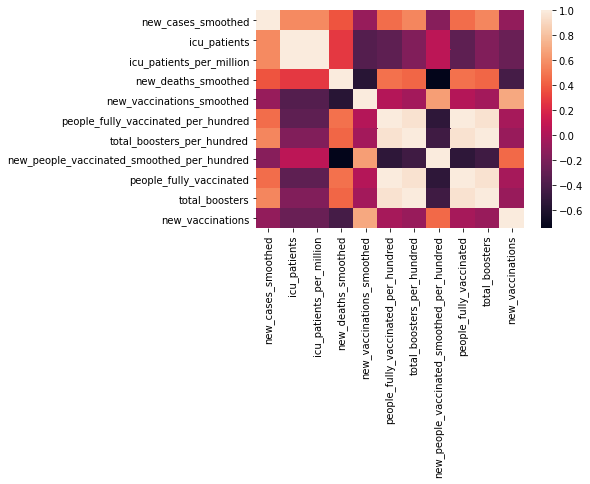

In [185]:
sns.heatmap(location_df.corr())

In [186]:
location_df = location_df.astype({'icu_patients_per_million':'int'})

In [229]:
#location_df['date'] = pd.to_datetime(location_df['date'])
#location_df = location_df.set_index('date')

# Target: what you're predicting -- your dependent variable
y = location_df['new_deaths_smoothed']

# Features: what you think affects your target -- your independent variables
X = location_df[['new_cases_smoothed',
                 'icu_patients',
                 'new_vaccinations_smoothed',
                 'people_fully_vaccinated',
                 'total_boosters',
                 'new_vaccinations']]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Model Fit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Results
y_test_df = pd.DataFrame(y_test)

y_pred_df = pd.DataFrame(y_pred, index = y_test_df.index)
res = pd.concat([y_pred_df, y_test_df], axis = 1)
res.columns = ['Predicted Deaths', 'Actual Deaths']
res['Delta'] = ((res['Predicted Deaths'] - res['Actual Deaths'])/res['Actual Deaths']) * 100

# Plot
res.plot()

,Predicted Deaths,Actual Deaths,Delta
date,,,
2022-01-02,1472.88270,1371.143,7.420065
2021-10-04,1892.23023,1908.857,-0.871033
2021-10-26,1551.55146,1557.714,-0.395614
2022-02-15,2286.15557,2279.143,0.307685
2022-01-05,1398.60179,1326.000,5.475248
2021-12-21,1403.69720,1409.571,-0.416708
2021-08-15,1096.06295,665.429,64.715236
2021-11-12,1196.33881,1198.000,-0.138664
2021-10-10,1617.47024,1671.857,-3.253075


<AxesSubplot:xlabel='date'>

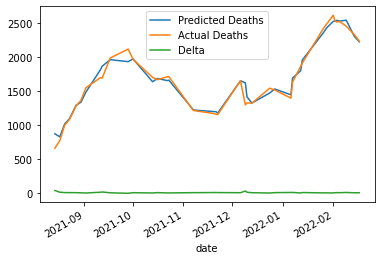

In [227]:
#location_df['date'] = pd.to_datetime(location_df['date'])
#location_df = location_df.set_index('date')

# Target: what you're predicting -- your dependent variable
y = location_df['new_deaths_smoothed']

# Features: what you think affects your target -- your independent variables
X = location_df[['new_cases_smoothed',
                 'icu_patients',
                 'new_vaccinations_smoothed',
                 'people_fully_vaccinated',
                 'total_boosters',
                 'new_vaccinations']]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Model Fit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Results
y_test_df = pd.DataFrame(y_test)

y_pred_df = pd.DataFrame(y_pred, index = y_test_df.index)
res = pd.concat([y_pred_df, y_test_df], axis = 1)
res.columns = ['Predicted Deaths', 'Actual Deaths']
res['Delta'] = ((res['Predicted Deaths'] - res['Actual Deaths'])/res['Actual Deaths']) * 100

# Plot
res.plot()

## Looping through every country

In [234]:
clean_selection['location'].value_counts()

Germany           426
Switzerland       420
Estonia           411
Canada            380
France            372
Denmark           335
South Korea       323
Israel            242
Czechia           242
Slovenia          235
Chile             197
United States     197
Malaysia          180
Belgium           168
Italy             168
United Kingdom    146
Ireland           146
Australia         143
Singapore         142
Portugal          141
Bolivia           131
Malta             105
Argentina          67
Spain              66
Luxembourg         57
Serbia             43
Finland            30
Cyprus             16
Japan               7
Sweden              2
Bulgaria            1
Name: location, dtype: int64

Argentina
Australia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Belgium
Bolivia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Bulgaria
Not enough data! :(((((
Canada
Chile


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Cyprus
Czechia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Denmark


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Estonia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Finland
France


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Germany


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Ireland
Israel


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Italy
Japan


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Luxembourg
Malaysia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Malta


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Portugal


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Serbia
Singapore


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Slovenia


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


South Korea


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Spain
Sweden


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Switzerland


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


United Kingdom
United States


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Predicted Deaths,Actual Deaths,Delta,Country
date,,,,
2021-12-20,19.54836,19.714,-0.840215,Argentina
2021-12-28,18.74574,18.857,-0.590020,Argentina
2021-12-12,16.87700,17.857,-5.488044,Argentina
2022-02-14,193.57545,200.857,-3.625241,Argentina
2022-02-12,196.43262,200.429,-1.993913,Argentina
...,...,...,...,...
2021-12-25,1501.20563,1477.000,1.638838,United States
2021-09-02,1479.64735,1544.000,-4.167918,United States
2021-10-28,1480.86714,1376.286,7.598794,United States


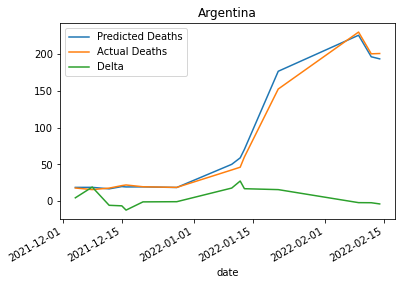

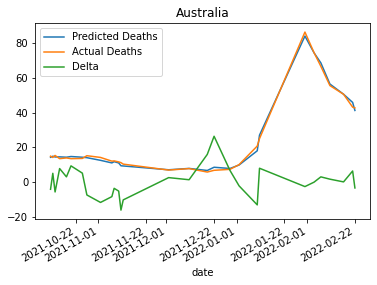

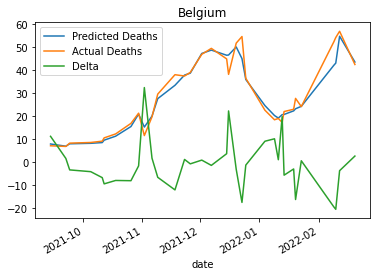

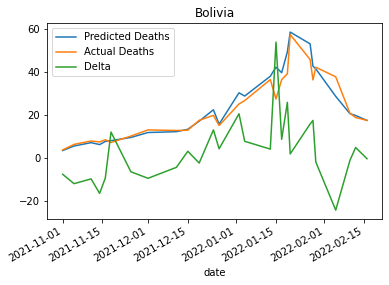

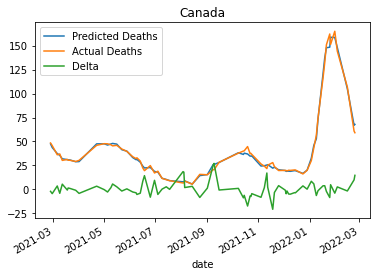

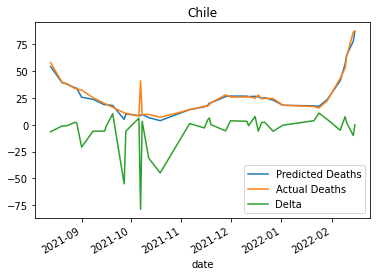

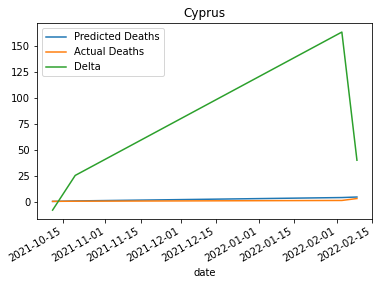

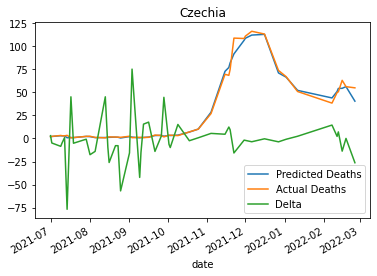

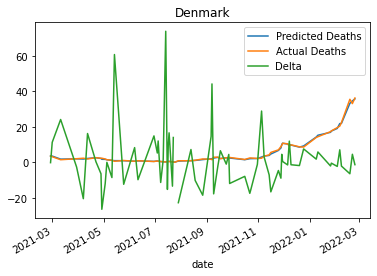

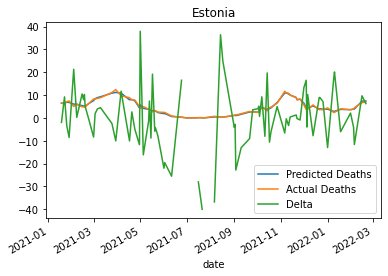

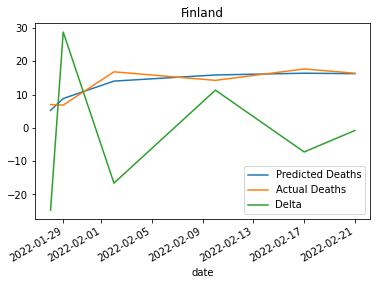

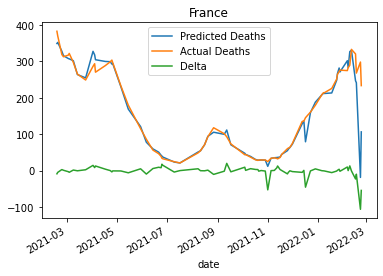

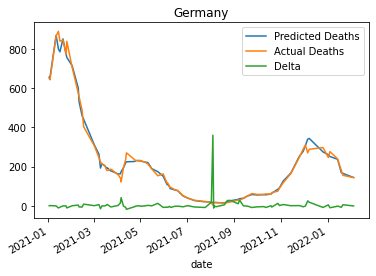

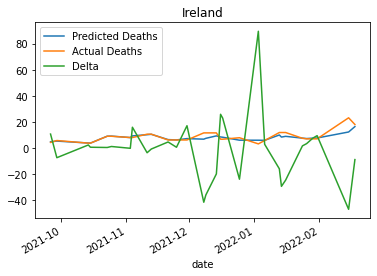

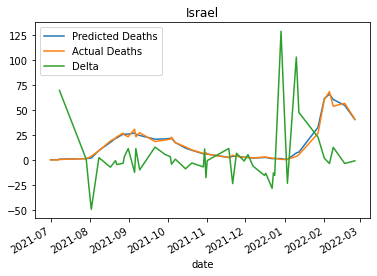

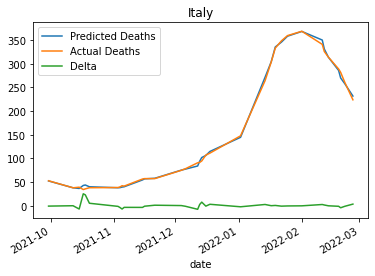

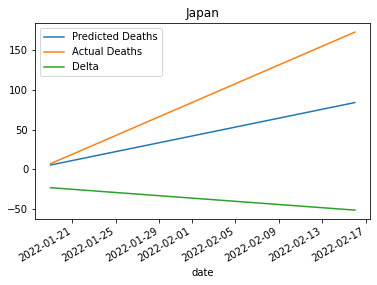

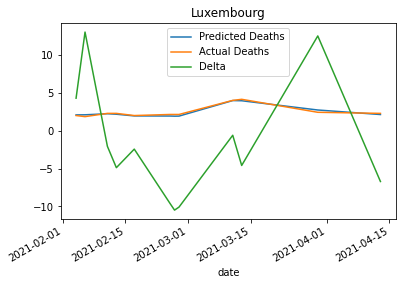

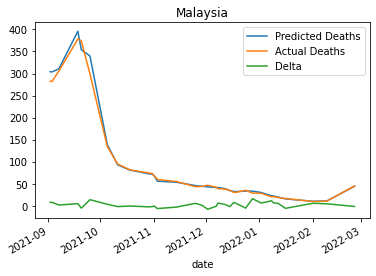

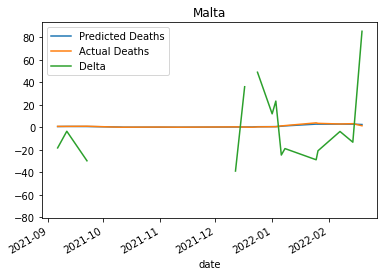

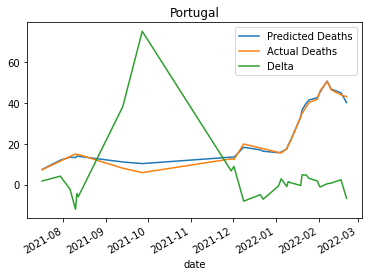

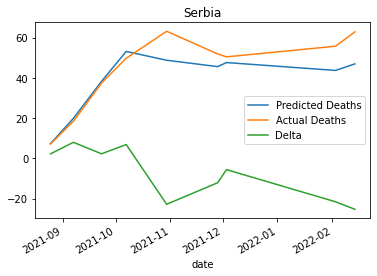

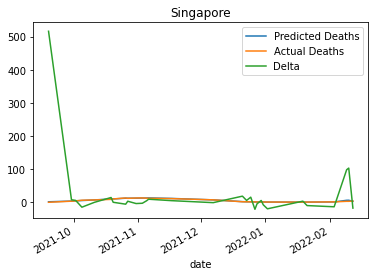

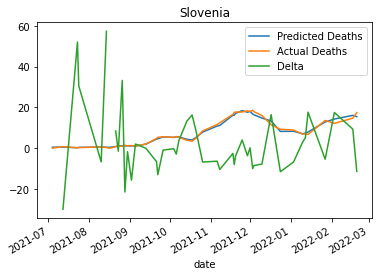

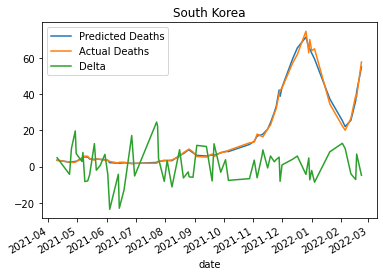

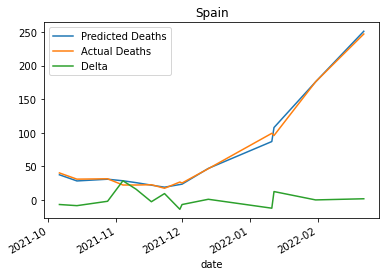

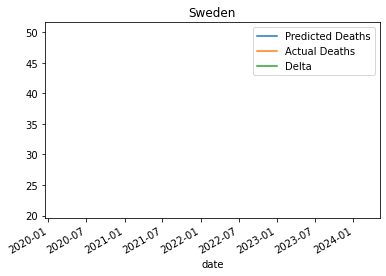

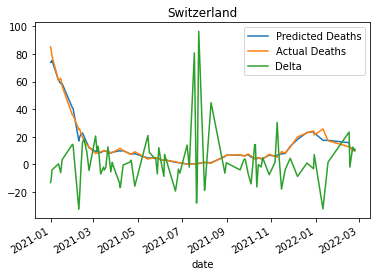

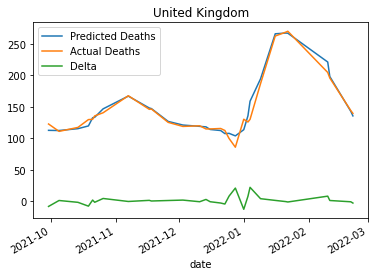

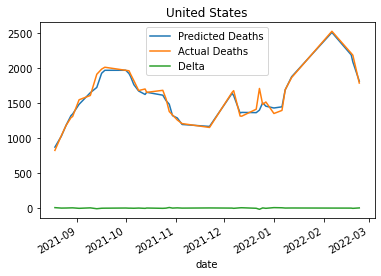

In [237]:
all_countries = clean_selection['location'].unique()
all_results = []
for country in all_countries:
    
    print(country)
    
    location_df = clean_selection[clean_selection['location'] == country]
    
    location_df['date'] = pd.to_datetime(location_df['date'])
    location_df = location_df.set_index('date')

    # Target: what you're predicting -- your dependent variable
    y = location_df['new_deaths_smoothed']

    # Features: what you think affects your target -- your independent variables
    X = location_df[['new_cases_smoothed',
                     'icu_patients',
                     'new_vaccinations_smoothed',
                     'people_fully_vaccinated',
                     'total_boosters',
                     'new_vaccinations']]
    
    try:

        # Train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

        # Model Fit
        model = RandomForestRegressor()
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Results
        y_test_df = pd.DataFrame(y_test)

        y_pred_df = pd.DataFrame(y_pred, index = y_test_df.index)
        res = pd.concat([y_pred_df, y_test_df], axis = 1)
        res.columns = ['Predicted Deaths', 'Actual Deaths']
        res['Delta'] = ((res['Predicted Deaths'] - res['Actual Deaths'])/res['Actual Deaths']) * 100
        res['Country'] = country

        # Plot
        res.plot(title = country)
        all_results.append(res)
    except:
        print('Not enough data! :(((((')
        
pd.concat(all_results)